In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation import *

In [2]:
n=5
A=get_xinmeng_like_matrix(n,seed=9894).T
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5()

Training Progress: 100%|██████████| 100/100 [00:20<00:00,  4.86it/s, accuracy=30.3600000000%, epoch=100, loss=2.0555091143]


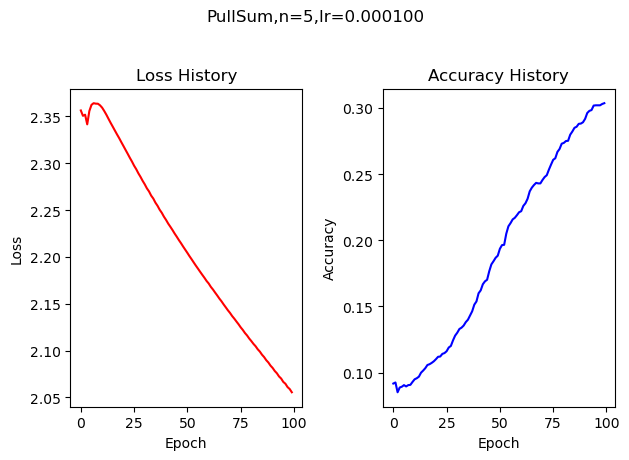

In [4]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer_1,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=100,lr=(1e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 100/100 [00:25<00:00,  3.98it/s, accuracy=9.0000000000%, epoch=100, loss=2.3006510258]


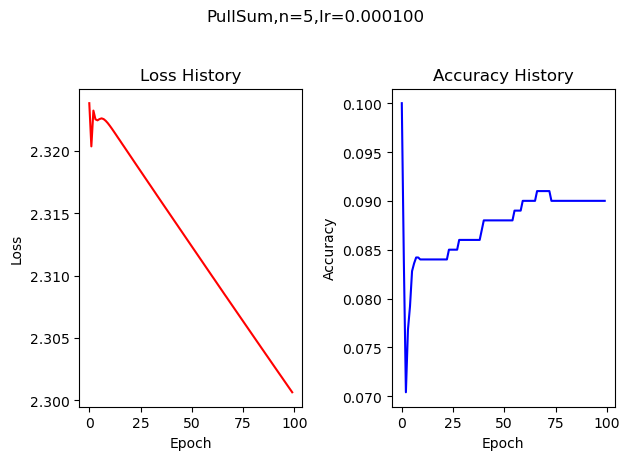

In [5]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=100,lr=(1e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 100/100 [00:25<00:00,  3.91it/s, accuracy=9.5800000000%, epoch=100, loss=2.6968504429]


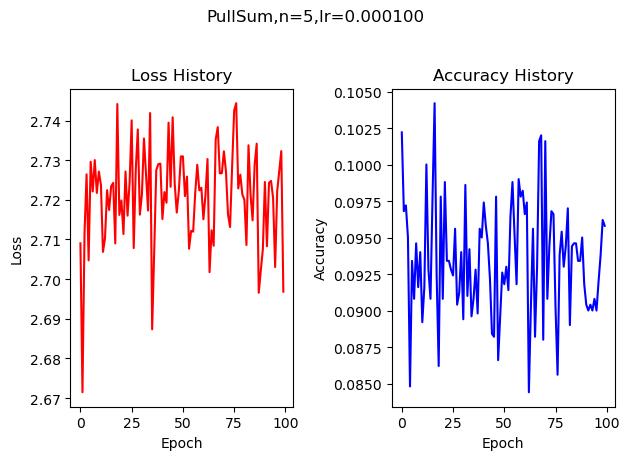

In [6]:
l3,a3=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer_3,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=100,lr=(1e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 150/150 [00:26<00:00,  5.60it/s, accuracy=26.2000000000%, epoch=150, loss=2.1263665676]


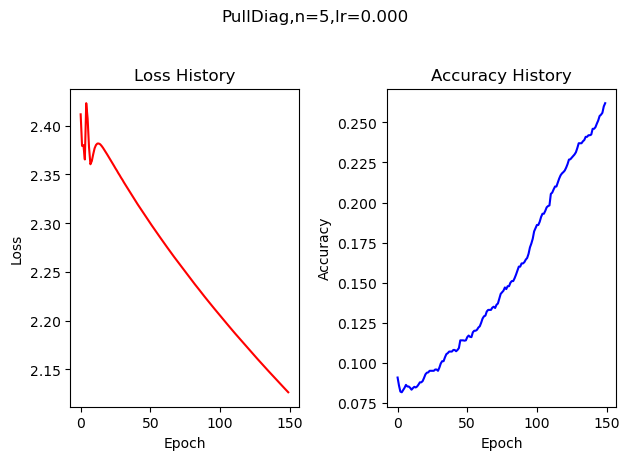

In [13]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_4layer_1,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=150,lr=(5e-5/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)